In [78]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Create a variable to hold the VADER lexicon object 
analyzer = SentimentIntensityAnalyzer()

# Preview the lexicon contents
analyzer.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [79]:
#Reading the txt file as a csv
df = pd.read_csv('/Users/SaberKlai/Documents/Projekt_SentAn/NLP_Project_progressing/src/preprocessed_tweets.txt', delimiter=" \t", engine='python')
#Adding a column with the title "Tweets"
df.columns = ['Tweets']
df

,Tweets
0,10000 bbsheep be now mint free mint first 2000...
1,good project binance
2,girl robot dragon 959 be purchase on opensea f...
3,ibbcoin have be approve for list on coinmoon n...
4,freemint giveaway prize 5x freemint enter 1fol...
...,...
2017,eth touch moon soon
2018,eth this will go up just give it time be a lon...
2019,eth be just go down down
2020,eth there be too many token not enough use cas...


In [80]:
senti_scores = []

for i in range(df['Tweets'].shape[0]):

# This method gives a sentiment dictionary: it takes in a string and returns a dictionary of scores in each of four categories: neg, neu, pos, comp.
# The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. Hence all these should add up to 1.
# The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

    compound = analyzer.polarity_scores(df['Tweets'][i])["compound"]
    pos = analyzer.polarity_scores(df['Tweets'][i])["pos"]
    neu = analyzer.polarity_scores(df['Tweets'][i])["neu"]
    neg = analyzer.polarity_scores(df['Tweets'][i])["neg"]
    
    if compound >= 0.5:
            ov = "POSITIVE"
    elif compound <= -0.5:
            ov = "NEGATIVE"
    elif compound > -0.5 and compound < 0.5: # hier an else-statement will also do
            ov = "NEUTRAL"

    senti_scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu,
                       "Overall": ov
                  })

In [81]:
sentiments_score = pd.DataFrame.from_dict(senti_scores)
df = df.join(sentiments_score)
df

,Tweets,Compound,Positive,Negative,Neutral,Overall
0,10000 bbsheep be now mint free mint first 2000...,0.8934,0.321,0.053,0.627,POSITIVE
1,good project binance,0.4404,0.592,0.000,0.408,NEUTRAL
2,girl robot dragon 959 be purchase on opensea f...,0.0000,0.000,0.000,1.000,NEUTRAL
3,ibbcoin have be approve for list on coinmoon n...,0.0000,0.000,0.000,1.000,NEUTRAL
4,freemint giveaway prize 5x freemint enter 1fol...,0.8750,0.278,0.000,0.722,POSITIVE
...,...,...,...,...,...,...
2017,eth touch moon soon,0.0000,0.000,0.000,1.000,NEUTRAL
2018,eth this will go up just give it time be a lon...,0.0000,0.000,0.000,1.000,NEUTRAL
2019,eth be just go down down,0.0000,0.000,0.000,1.000,NEUTRAL
2020,eth there be too many token not enough use cas...,-0.5859,0.000,0.179,0.821,NEGATIVE


In [82]:
df['Overall'].value_counts()

NEUTRAL     1162
POSITIVE     816
NEGATIVE      44
Name: Overall, dtype: int64

<AxesSubplot:title={'center':'The distribution of the overall sentiments about Ethereum'}, ylabel='Overall'>

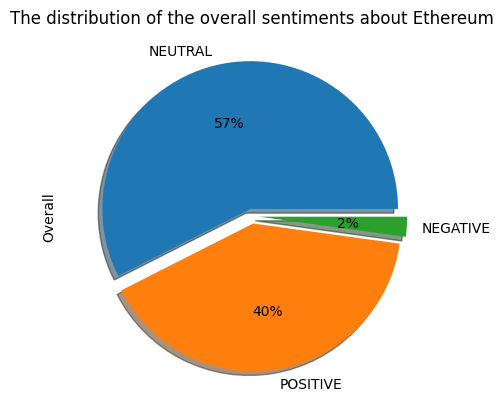

In [83]:
explode = (0.05, 0.05, 0.05)
df['Overall'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='The distribution of the overall sentiments about Ethereum', explode=explode, shadow=True)